In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
train = pd.read_csv('..\\train.csv')
test = pd.read_csv('..\\test.csv')

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [6]:
'''No null values'''
np.sum(pd.isnull(train).sum() != 0)

0

## build a basic logistic regression to have a baseline score

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [9]:
model_LR = LogisticRegression()
model_LR.fit(train.iloc[:,2:].values, train.iloc[:,1].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
baseline_submission = model_LR.predict_proba(test.iloc[:,1:].values)

In [13]:
baseline_submission = baseline_submission[:,1]

In [17]:
submission_file = pd.DataFrame(test.iloc[:,0].values, columns = ['ID_code'])
submission_file['target'] = baseline_submission

In [18]:
submission_file.to_csv('..\\submissions\\submission_file.csv', index=None)

#### Just Using a logistic regression on all variables gives 0.86 on leader board.

### let's build a dev / validation set

In [19]:
'''let us split 200K entries of train set as training and validation sets with 100K in each'''
random.seed(11)
validation_set = random.sample([idx for idx in train.index], np.int(0.5*train.shape[0]))
training_set = list(set(train.index) - set(validation_set))

In [21]:
len(training_set)

100000

In [22]:
validation_data = train.loc[validation_set,:].copy()
training_data = train.loc[training_set,:].copy()

In [25]:
training_data['target'].sum()

10088

In [26]:
validation_data['target'].sum()

10010

In [27]:
del train

In [29]:
'''lets see if the baseline model stands here'''
model_LR_internal = LogisticRegression()
model_LR_internal.fit(training_data.iloc[:,2:].values, training_data.iloc[:,1].values)

ValueError: X has 201 features per sample; expecting 200

In [30]:
validation_prediction = model_LR_internal.predict_proba(validation_data.iloc[:,2:].values)

In [33]:
score_check = roc_auc_score(validation_data.iloc[:,1].values, validation_prediction[:,1])

In [34]:
score_check

0.85820740099993353

In [36]:
train_prediction = model_LR_internal.predict_proba(training_data.iloc[:,2:].values)

In [38]:
train_check = roc_auc_score(training_data.iloc[:,1].values, train_prediction[:,1])

In [39]:
train_check

0.86198197895180484

In [40]:
'''Boht the training and validation sets have same roc indicating some extra information need to be created 
and feed to the model'''

'Boht the training and validation sets have same roc indicating some extra information need to be created \nand feed to the model'

In [35]:
'''AUC of the valdiation set is same as in the private leader board by the baseline logistic regression model. 
So the validation set can be of the reall test set.'''

'AUC of the valdiation set is same as in the private leader board by the baseline logistic regression model. \nSo the validation set can be of the reall test set.'

### visualization

### Permutation Imortance

In [48]:
import eli5
from eli5.sklearn import PermutationImportance
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
start = datetime.now()
perm = PermutationImportance(model_LR_internal, random_state=1, scoring='roc_auc').fit(training_data.iloc[:,2:].values, training_data.iloc[:,1].values)
eli5.show_weights(perm, feature_names = training_data.iloc[:,2:].columns.tolist())
end = datetime.now()

In [64]:
?PermutationImportance

In [63]:
eli5.show_weights(perm, feature_names = training_data.iloc[:,2:].columns.tolist(), top = 200)

Weight,Feature
0.0077 ± 0.0003,var_81
0.0058 ± 0.0006,var_6
0.0055 ± 0.0008,var_139
0.0053 ± 0.0006,var_12
0.0046 ± 0.0009,var_146
0.0046 ± 0.0004,var_53
0.0041 ± 0.0005,var_76
0.0041 ± 0.0007,var_110
0.0041 ± 0.0007,var_22
0.0040 ± 0.0003,var_99


In [66]:
feature_importance_ = perm.feature_importances_

In [71]:
feature_imp_PI = pd.DataFrame([training_data.columns[2:],feature_importance_]).T

In [73]:
feature_imp_PI.columns = ['variable','average_decrease']

In [92]:
np.sum(feature_imp_PI['average_decrease'] > 0.0040)

10

In [108]:
columns_after_PI = feature_imp_PI[feature_imp_PI['average_decrease'] > 0.0001]['variable'].values

In [109]:
columns_after_PI

array(['var_0', 'var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_8',
       'var_9', 'var_11', 'var_12', 'var_13', 'var_15', 'var_18', 'var_20',
       'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26',
       'var_28', 'var_29', 'var_31', 'var_32', 'var_33', 'var_34',
       'var_35', 'var_36', 'var_40', 'var_43', 'var_44', 'var_45',
       'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52',
       'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58',
       'var_59', 'var_62', 'var_63', 'var_66', 'var_67', 'var_70',
       'var_71', 'var_72', 'var_74', 'var_75', 'var_76', 'var_77',
       'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83',
       'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89',
       'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95',
       'var_97', 'var_99', 'var_102', 'var_104', 'var_105', 'var_106',
       'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112',
       'var_114', 'var_115', 'var_116', 

In [101]:
model_LR_internal_PI = LogisticRegression()
model_LR_internal_PI.fit(training_data.loc[:,columns_after_PI], training_data.iloc[:,1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
validation_prediction_PI = model_LR_internal_PI.predict_proba(validation_data.loc[:,columns_after_PI])

In [103]:
roc_auc_score(validation_data.iloc[:,1], validation_prediction_PI[:,1])

0.77697341773683581

In [104]:
training_prediction_PI = model_LR_internal_PI.predict_proba(training_data.loc[:,columns_after_PI])

In [105]:
roc_auc_score(training_data.iloc[:,1], training_prediction_PI[:,1])

0.78022119314795346

In [79]:
feature_imp_PI[feature_imp_PI['variable'] == 'var_96']

,variable,average_decrease
96,var_96,8.50536e-05


In [67]:
np.where(feature_importance_ == np.max(feature_importance_))

(array([81], dtype=int64),)

In [57]:
#eli5.show_weights(perm)

In [106]:
'''removing all the features whose impact is nearly 0.0001 is not hampering (nearly 40 variables got removed )
the auc's validation or training dataset
'''
feature_imp_PI.to_csv('..\\intermediate_files\\feature_imp_PI.csv', index=None)

## visualization

In [134]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (15,60))
    
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        ax.set_title(var_name+" Distribution")
    #fig.tight_layout()  # Improves appearance a bit.
    plt.show()

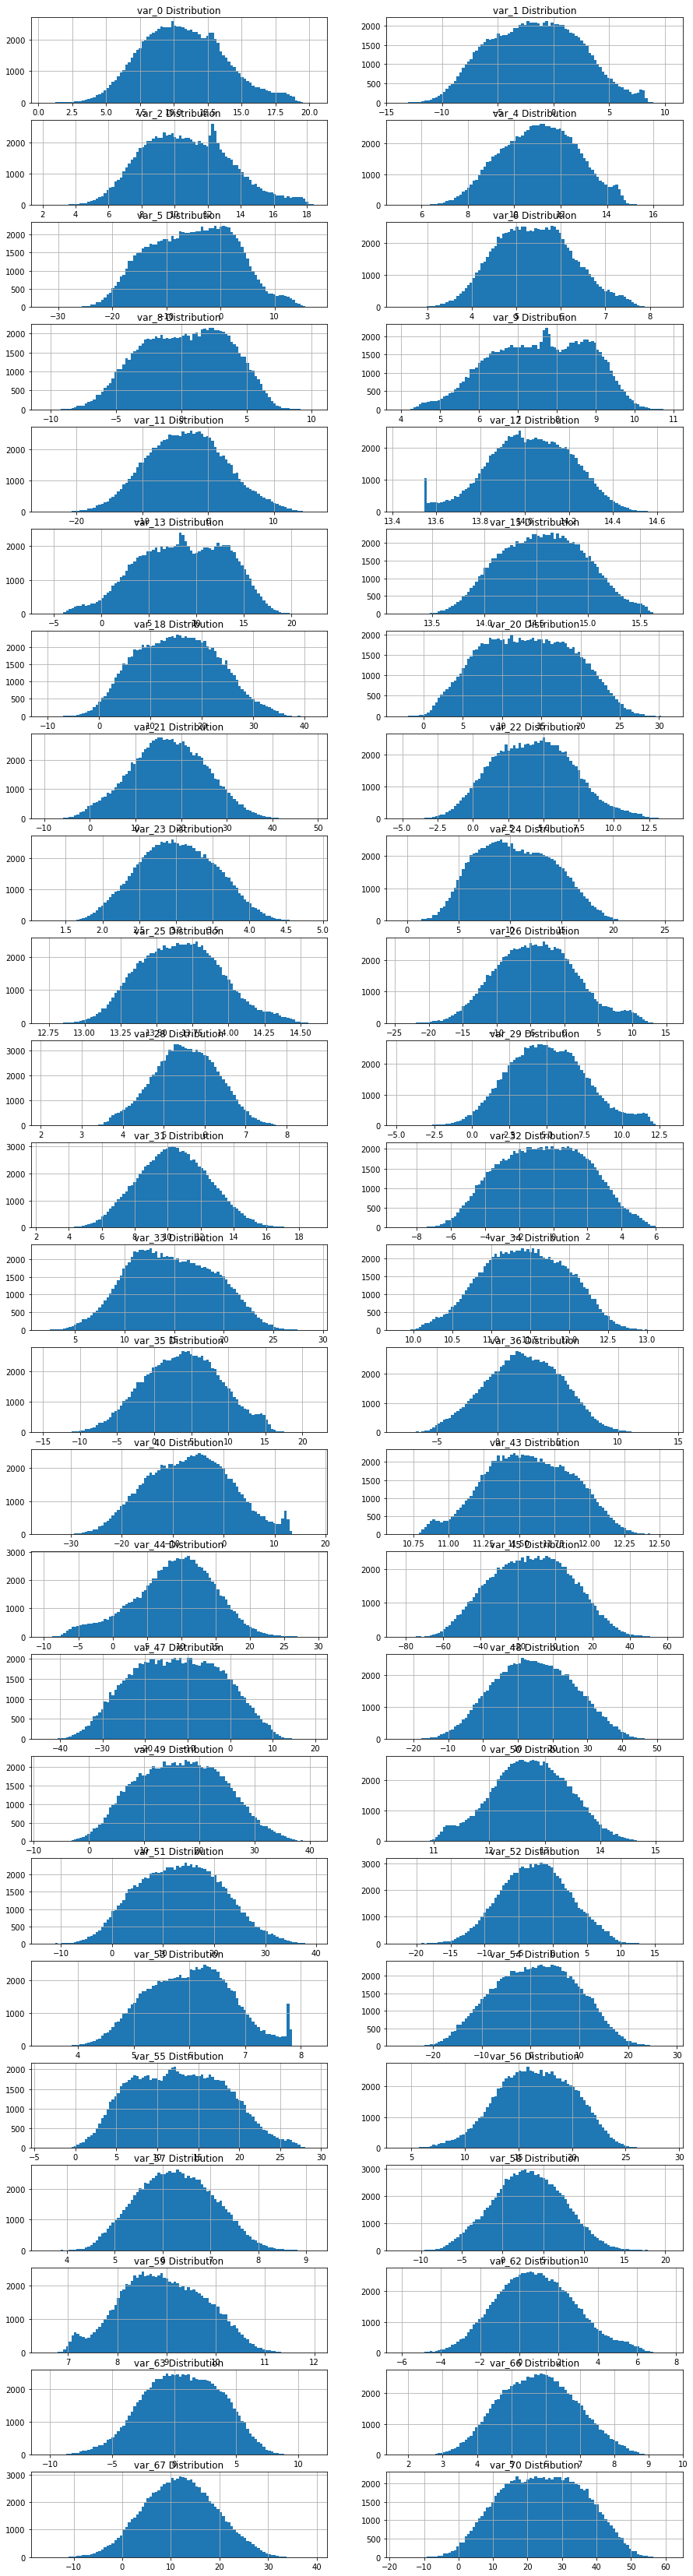

In [135]:
draw_histograms(training_data, columns_after_PI[:50], 50/2, 2)

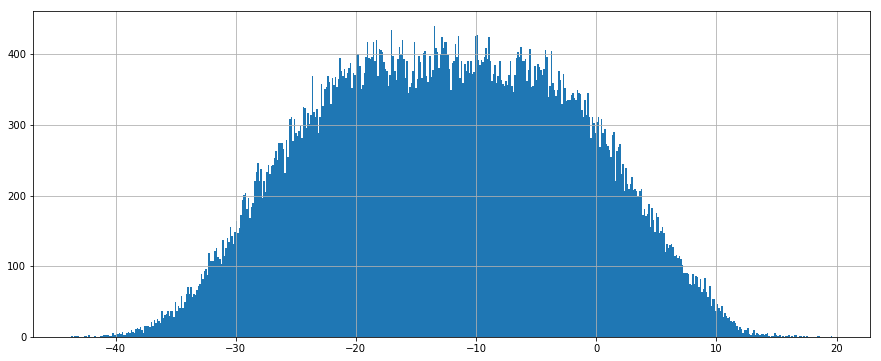

In [141]:
plt.figure(figsize=(15,6))
training_data['var_47'].hist(bins=500)

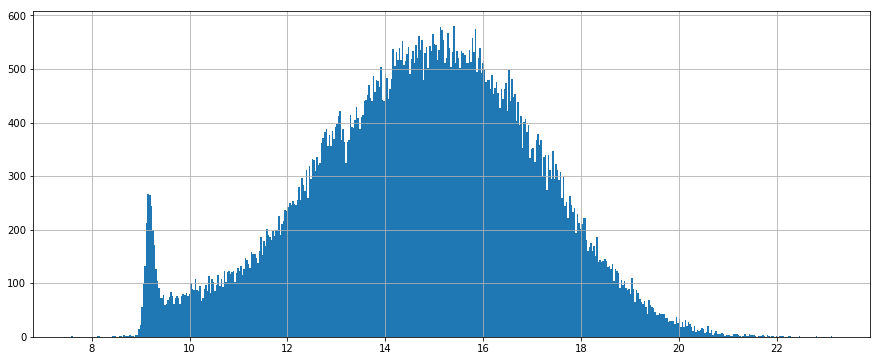

In [143]:
plt.figure(figsize=(15,6))
training_data['var_81'].hist(bins=500)

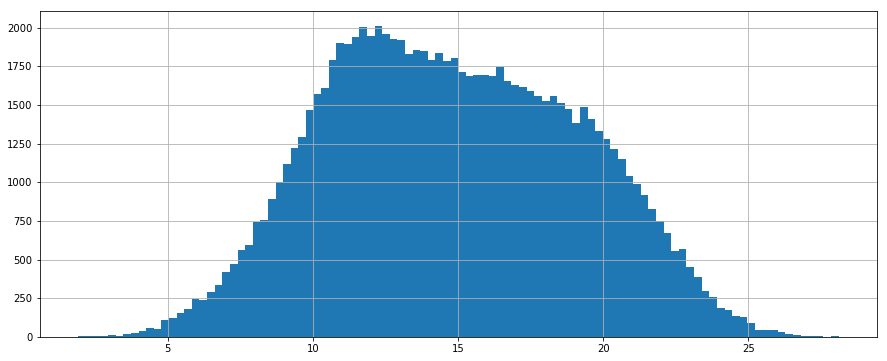

In [155]:
plt.figure(figsize=(15,6))
training_data.loc[training_data['target']==0,'var_33'].hist(bins=100)
#training_data.loc[training_data['target']==1,'var_33'].hist(bins=100)

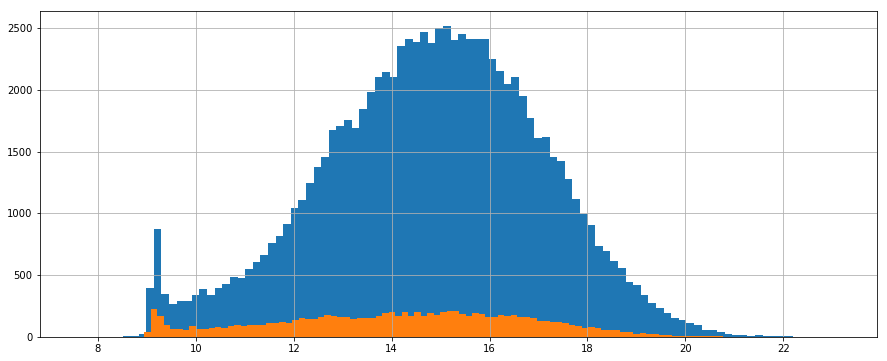

In [148]:
plt.figure(figsize=(15,6))
training_data.loc[training_data['target']==0,'var_81'].hist(bins=100)
training_data.loc[training_data['target']==1,'var_81'].hist(bins=100)

### Interaction_1

In [167]:
def auc_score(actual, pred):
    return roc_auc_score(actual, pred)

In [158]:
feature_imp_PI.sort_values(['average_decrease'], ascending = False, inplace=True)

In [160]:
top_10_list = feature_imp_PI.iloc[:10,0].values.tolist()

In [164]:
for i in top_10_list:
    for j in top_10_list:
        if i != j:
            new_var =  i + j
            training_data[new_var] = training_data[i]*training_data[j]
            validation_data[new_var] = validation_data[i]*validation_data[j]

In [166]:
model_LR_internal_interaction = LogisticRegression()
model_LR_internal_interaction.fit(training_data.iloc[:,2:].values,training_data.iloc[:,1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
validation_int = model_LR_internal_interaction.predict_proba(validation_data.iloc[:,2:].values)

In [170]:
auc_score(validation_data.iloc[:,1].values, validation_int[:,1])

0.85792189586166689

In [171]:
training_int = model_LR_internal_interaction.predict_proba(training_data.iloc[:,2:].values)

In [172]:
auc_score(training_data.iloc[:,1].values, training_int[:,1])

0.86238392055596313

In [174]:
training_data.to_csv('..\\intermediate_files\\training_data.csv', index=None)
validation_data.to_csv('..\\intermediate_files\\validation_data.csv', index=None)
feature_imp_PI.to_csv('..\\intermediate_files\\feature_importance.csv', index=None)